<a href="https://colab.research.google.com/github/filipnovicky/Bistable_Perception/blob/main/Figures6andS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install h5py
!pip install bioinfokit
!pip install statannot

import os
import matplotlib.pyplot as plt
import h5py, pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as stats
from statannot import add_stat_annotation
os.chdir('/content/drive/MyDrive/Bistable') # Add the data from the analysis to your Drive



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Prepare data for posterior switch probability

df = pd.read_csv('tab_bistable.csv', header=None)
df.describe()
df.columns = ['trial', 'epoch', 'zeta', 'gamma', 'omega', 'posterior']

zeta = df.iloc[:,[0,1,2,5]]
zeta['precision'] = 'zeta'
zeta.columns = ['trial', 'epoch', 'value', 'posterior','precision']
gamma = df.iloc[:,[0,1,3,5]]
gamma['precision'] = 'gamma'
gamma.columns = ['trial', 'epoch', 'value', 'posterior','precision']
omega = df.iloc[:,[0,1,4,5]]
omega['precision'] = 'omega'
omega.columns = ['trial', 'epoch', 'value', 'posterior','precision']
df_restacked = pd.concat([zeta, gamma,omega],axis=0)
df_restack0 = df_restacked[df_restacked['posterior']>=0.5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Text(281.5, 0.5, 'Precision value')

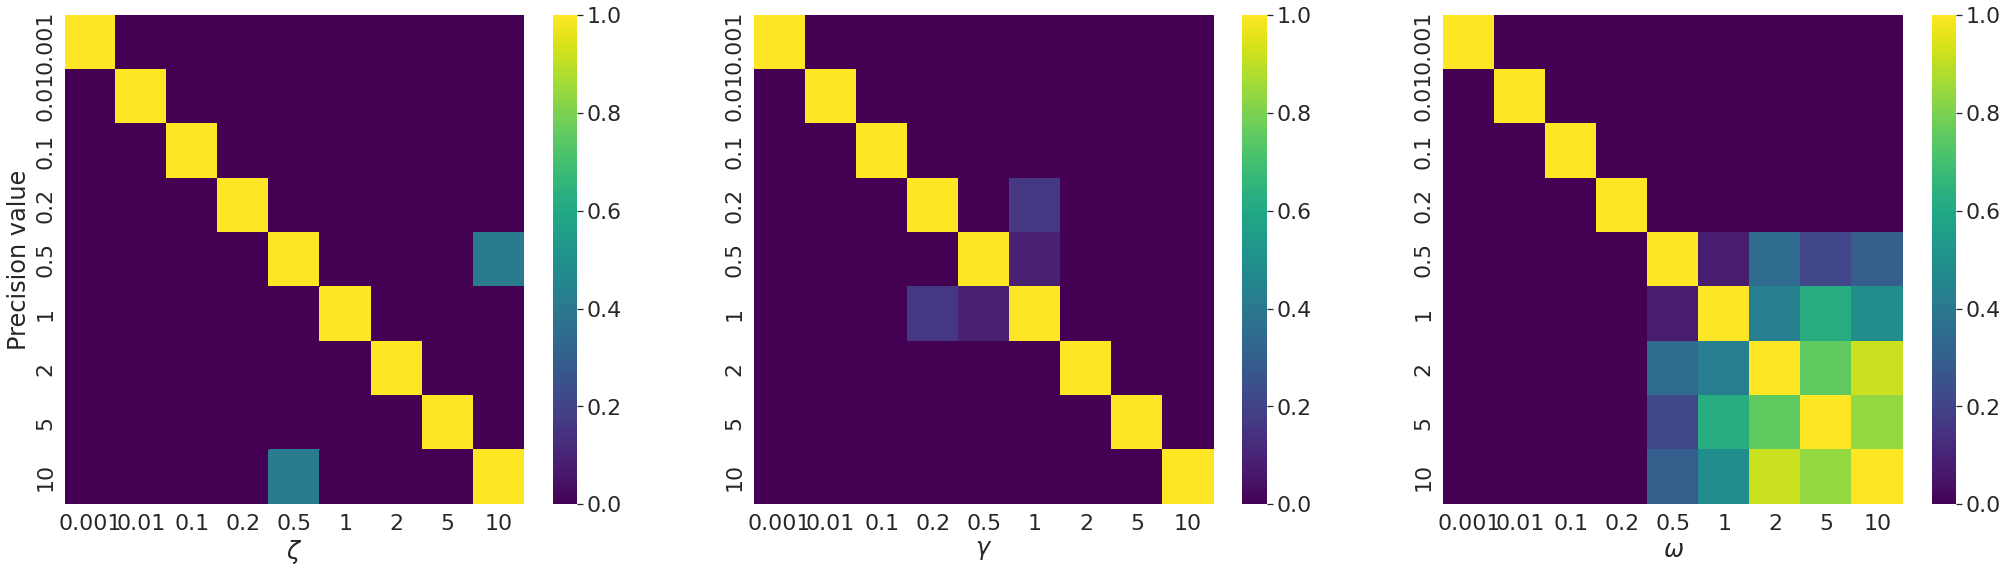

In [ ]:
## FIGURE S1

values = list(range(1,10)) # Number of precision terms
# Figure S1A

zetastats = np.zeros((len(values), len(values)))
betastats = np.zeros((len(values), len(values)))
omegastats = np.zeros((len(values), len(values)))


for j in values:
  for i in values:

    zetastats[j-1,i-1] = stats.ttest_ind(zeta[zeta['value']==j].posterior,zeta[zeta['value']==i].posterior,equal_var=False)[1]
    betastats[j-1,i-1] = stats.ttest_ind(gamma[gamma['value']==j].posterior,gamma[gamma['value']==i].posterior,equal_var=False)[1]
    omegastats[j-1,i-1] = stats.ttest_ind(omega[omega['value']==j].posterior,omega[omega['value']==i].posterior,equal_var=False)[1]

la = [r'$\zeta$', r'$\gamma$', r'$\omega$']
sns.set(style = 'white', font_scale=2) 
fig, axs = plt.subplots(ncols=3,figsize=(35,9))
sns.heatmap(zetastats, cmap='viridis',ax=axs[0])
sns.heatmap(betastats, cmap='viridis',ax=axs[1])
sns.heatmap(omegastats, cmap='viridis',ax=axs[2])
for i in [0,1,2]:
  axs[i].set_xticklabels(['0.001', '0.01', '0.1', '0.2', '0.5', '1', '2', '5', '10'])
  axs[i].set_yticklabels(['0.001', '0.01', '0.1', '0.2', '0.5', '1', '2', '5', '10'])
  axs[i].set_xlabel(la[i])

axs[0].set_ylabel("Precision value")
# plt.savefig('poster_sign.pdf', dpi=1000)

In [ ]:
# Prepare data

switch = pd.read_csv('data.csv')
switch.columns = ['zeta', 'gamma', 'omega', 'switch']

zetas = switch.iloc[:,[0,3]]
zetas['precision'] = 'zeta'
zetas.columns = ['value', 'posterior','precision']
gammas = switch.iloc[:,[1,3]]
gammas['precision'] = 'gamma'
gammas.columns = ['value', 'posterior','precision']
omegas = switch.iloc[:,[2,3]]
omegas['precision'] = 'omega'
omegas.columns = ['value', 'posterior','precision']
switch_restacked = pd.concat([zetas, gammas,omegas],axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Text(281.5, 0.5, 'No. of switches')

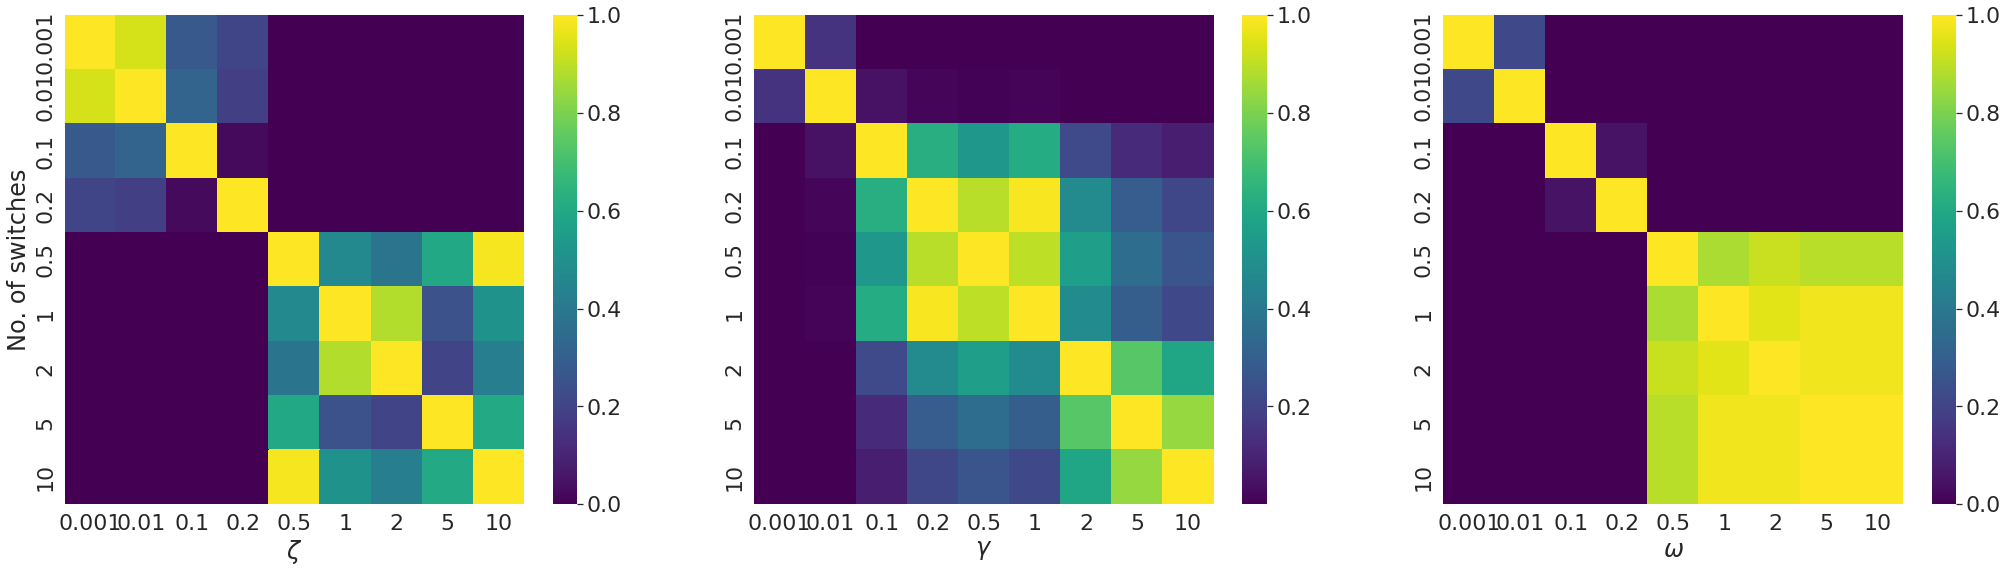

In [ ]:
# Figure S1B

values = list(range(1,10))
zetastat = np.zeros((len(values), len(values)))
betastat = np.zeros((len(values), len(values)))
omegastat = np.zeros((len(values), len(values)))


for j in values:
  for i in values:

    zetastat[j-1,i-1] = stats.ttest_ind(zetas[zetas['value']==j].posterior,zetas[zetas['value']==i].posterior,equal_var=False)[1]
    betastat[j-1,i-1] = stats.ttest_ind(gammas[gammas['value']==j].posterior,gammas[gammas['value']==i].posterior,equal_var=False)[1]
    omegastat[j-1,i-1] = stats.ttest_ind(omegas[omegas['value']==j].posterior,omegas[omegas['value']==i].posterior,equal_var=False)[1]


la = [r'$\zeta$', r'$\gamma$', r'$\omega$']
sns.set(style = 'white', font_scale=2) 
fig, axs = plt.subplots(ncols=3,figsize=(35,9))
sns.heatmap(zetastat, cmap='viridis',ax=axs[0])
sns.heatmap(betastat, cmap='viridis',ax=axs[1])
sns.heatmap(omegastat, cmap='viridis',ax=axs[2])
for i in [0,1,2]:
  axs[i].set_xticklabels(['0.001', '0.01', '0.1', '0.2', '0.5', '1', '2', '5', '10'])
  axs[i].set_yticklabels(['0.001', '0.01', '0.1', '0.2', '0.5', '1', '2', '5', '10'])
  axs[i].set_xlabel(la[i])

axs[0].set_ylabel("No. of switches")
# plt.savefig('switch_sign.pdf', dpi=1000)

In [ ]:
# Prepare data

df = pd.read_csv('tab_bistable.csv', header=None)
df.columns = ['trial', 'epoch', 'zeta', 'gamma', 'omega', 'posterior']
combined_df =df.groupby(['zeta', 'gamma', 'omega']).max().reset_index()

combined_df = combined_df.iloc[:,[0,1,2,5]]

zetadf = combined_df.iloc[:,[0,3]]
zetadf['precision'] = 'zeta'
zetadf.columns = ['value', 'post','precision']
gammadf = combined_df.iloc[:,[1,3]]
gammadf['precision'] = 'gamma'
gammadf.columns = ['value', 'post','precision']
omegadf = combined_df.iloc[:,[2,3]]
omegadf['precision'] = 'omega'
omegadf.columns = ['value', 'post','precision']
comb_restacked = pd.concat([zetadf, gammadf,omegadf],axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Text(0.5, 27.49999999999995, 'Posterior switch probability (>0.5)')

<Figure size 12000x10000 with 0 Axes>

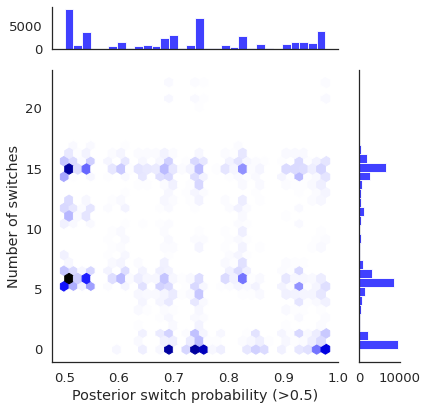

In [ ]:
# Figure 6

# Zeta analysis
data_zeta = zetadf.merge(zetas, how='left', on=['value', 'precision'])
sns.set(style = 'white', font_scale=1.2) 
fig = plt.figure(figsize=(12,10), dpi=1000)

ax= sns.jointplot(x='post', y='posterior',data=data_zeta[data_zeta['post']>=0.5], kind='hex', color='blue',space = 0.5,marginal_ticks = True)
plt.ylabel('Number of switches')
plt.xlabel('Posterior switch probability (>0.5)')



Text(0.5, 27.49999999999995, 'Posterior switch probability (>0.5)')

<Figure size 864x720 with 0 Axes>

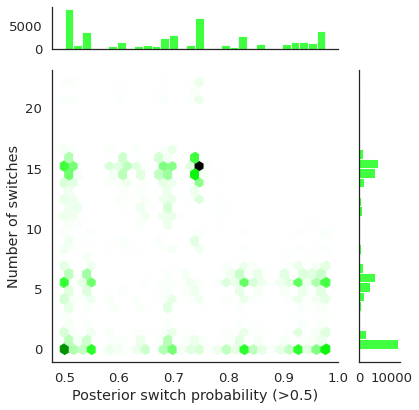

In [ ]:
# Omega analysis
data_omega = omegadf.merge(omegas, how='left', on=['value', 'precision'])
sns.set(style = 'white',font_scale=1.2)
fig = plt.figure(figsize=(12,10))
ax=sns.jointplot(x='post', y='posterior',data=data_omega[data_omega['post']>=0.5], kind='hex',color='lime',space = 0.5, marginal_ticks = True)
plt.ylabel('Number of switches')
plt.xlabel('Posterior switch probability (>0.5)')

Text(0.5, 27.49999999999995, 'Posterior switch probability (>0.5)')

<Figure size 864x720 with 0 Axes>

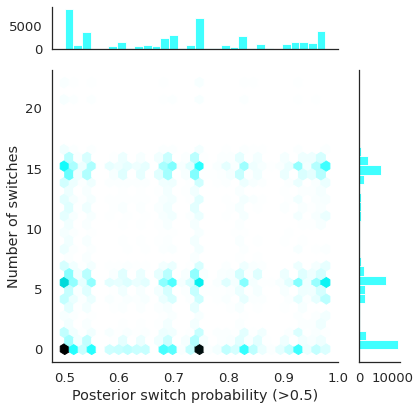

In [ ]:
# Gamma analysis
data_gamma = gammadf.merge(gammas, how='left', on=['value', 'precision'])
sns.set(style = 'white', font_scale=1.2)
fig = plt.figure(figsize=(12,10))
sns.jointplot(x='post', y='posterior',data=data_gamma[data_gamma['post']>=0.5],kind='hex',  color='cyan',space = 0.5,marginal_ticks = True)
plt.ylabel('Number of switches')
plt.xlabel('Posterior switch probability (>0.5)')